In [113]:
import warnings
warnings.filterwarnings("ignore")

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from simpledbf import Dbf5

import re
from tqdm import tqdm

In [115]:
res_22 = pd.read_csv('data/state_g22_sov_data_by_g22_srprec.csv')
res_22.head()

,COUNTY,FIPS,SRPREC,ELECTION,SRPREC_KEY,GEO_TYPE,ADDIST,CDDIST,SDDIST,BEDIST,...,SOSDEM01,SOSREP01,SPINOP01,SPINOP02,TRSDEM01,TRSREP01,USPDEM01,USPREP01,USSDEM01,USSREP01
0,1,6001,200100,g22,06001200100,srprec,14,12,7,2,...,2419,141,212,2035,2360,179,2415,132,2421,134
1,1,6001,200200,g22,06001200200,srprec,14,12,7,2,...,1516,100,113,1235,1470,115,1506,108,1520,104
2,1,6001,201400,g22,06001201400,srprec,14,12,7,2,...,2348,138,168,1965,2276,169,2329,132,2349,129
3,1,6001,202200,g22,06001202200,srprec,14,12,7,2,...,274,21,31,206,259,31,268,22,269,22
4,1,6001,202500,g22,06001202500,srprec,14,12,7,2,...,241,23,29,185,234,28,234,24,236,22


In [116]:
## 2022 data engineering

In [117]:
cols = res_22.columns.values
pr_cols = cols[[x.startswith('PR_') for x in cols]]
pr_cols

array(['PR_1_N', 'PR_1_Y', 'PR_26_N', 'PR_26_Y', 'PR_27_N', 'PR_27_Y',
       'PR_28_N', 'PR_28_Y', 'PR_29_N', 'PR_29_Y', 'PR_30_N', 'PR_30_Y',
       'PR_31_N', 'PR_31_Y'], dtype=object)

In [118]:
res_22 = res_22[np.append(pr_cols, 'SRPREC_KEY')]
res_22.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,PR_30_N,PR_30_Y,PR_31_N,PR_31_Y,SRPREC_KEY
0,109,2372,1849,620,2260,264,391,2173,1604,859,1024,1516,284,2235,06001200100
1,85,1470,1151,416,1455,151,250,1356,1017,549,594,1000,205,1397,06001200200
2,104,2271,1686,672,2163,258,355,2100,1410,955,810,1643,298,2145,06001201400
3,24,252,173,103,230,50,46,237,150,123,73,215,58,224,06001202200
4,22,232,126,128,203,61,29,238,119,141,69,197,46,215,06001202500


In [119]:
props = np.unique([re.sub("_Y", "", re.sub("_N", "", pr)) for pr in pr_cols])
props

array(['PR_1', 'PR_26', 'PR_27', 'PR_28', 'PR_29', 'PR_30', 'PR_31'],
      dtype='<U5')

In [120]:
for pr in props:
    res_22[f'{pr}_TOT'] = res_22[f'{pr}_Y'] + res_22[f'{pr}_N']
res_22.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,109,2372,1849,620,2260,264,391,2173,1604,859,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
1,85,1470,1151,416,1455,151,250,1356,1017,549,...,205,1397,06001200200,1555,1567,1606,1606,1566,1594,1602
2,104,2271,1686,672,2163,258,355,2100,1410,955,...,298,2145,06001201400,2375,2358,2421,2455,2365,2453,2443
3,24,252,173,103,230,50,46,237,150,123,...,58,224,06001202200,276,276,280,283,273,288,282
4,22,232,126,128,203,61,29,238,119,141,...,46,215,06001202500,254,254,264,267,260,266,261


In [121]:
## Crosswalk data

In [122]:
cw_22 = pd.read_csv('crosswalk/state_g22_sr_blk_map.csv')
cw_24 = pd.read_csv('crosswalk/state_g24_sr_blk_map.csv')
cw_22.head()

,COUNTY,BLOCK_KEY,FIPS,SRPREC,TRACT,SRPREC_KEY,ELECTION,GEO_TYPE,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,3472.0,1.612903,56,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,3472.0,1.209677,42,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,3472.0,2.476959,86,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,3472.0,3.168203,110,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,3472.0,2.649770,92,100.0


In [123]:
cw_24.head()

,COUNTY,BLOCK_KEY,FIPS,SRPREC,TRACT,SRPREC_KEY,ELECTION,GEO_TYPE,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,1,60014211001000,6001,200100,421100,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0


In [176]:
cw_22.shape, cw_24.shape

((390976, 14), (421137, 14))

In [124]:
cw = pd.merge(left=cw_22, right=cw_24, on='BLOCK_KEY', how='inner')
cw.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,TRACT_y,SRPREC_KEY_y,ELECTION_y,GEO_TYPE_y,BLOCK_y,BLKREG_y,SRTOTREG_y,PCTSRPREC_y,BLKTOTREG_y,PCTBLK_y
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,...,421100,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,...,421100,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,...,421100,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,...,421100,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,...,421100,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0


In [125]:
cw.shape

(447264, 27)

In [126]:
cw.columns.values

array(['COUNTY_x', 'BLOCK_KEY', 'FIPS_x', 'SRPREC_x', 'TRACT_x',
       'SRPREC_KEY_x', 'ELECTION_x', 'GEO_TYPE_x', 'BLOCK_x', 'BLKREG_x',
       'SRTOTREG_x', 'PCTSRPREC_x', 'BLKTOTREG_x', 'PCTBLK_x', 'COUNTY_y',
       'FIPS_y', 'SRPREC_y', 'TRACT_y', 'SRPREC_KEY_y', 'ELECTION_y',
       'GEO_TYPE_y', 'BLOCK_y', 'BLKREG_y', 'SRTOTREG_y', 'PCTSRPREC_y',
       'BLKTOTREG_y', 'PCTBLK_y'], dtype=object)

In [127]:
cons = pd.merge(left=res_22, right=cw, left_on='SRPREC_KEY', right_on='SRPREC_KEY_x', how='inner')
cons.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,...,TRACT_y,SRPREC_KEY_y,ELECTION_y,GEO_TYPE_y,BLOCK_y,BLKREG_y,SRTOTREG_y,PCTSRPREC_y,BLKTOTREG_y,PCTBLK_y
0,109,2372,1849,620,2260,264,391,2173,1604,859,...,421100,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0
1,109,2372,1849,620,2260,264,391,2173,1604,859,...,421100,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0
2,109,2372,1849,620,2260,264,391,2173,1604,859,...,421100,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0
3,109,2372,1849,620,2260,264,391,2173,1604,859,...,421100,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0
4,109,2372,1849,620,2260,264,391,2173,1604,859,...,421100,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0


In [128]:
cons.shape

(447257, 49)

In [129]:
cons.columns.values

array(['PR_1_N', 'PR_1_Y', 'PR_26_N', 'PR_26_Y', 'PR_27_N', 'PR_27_Y',
       'PR_28_N', 'PR_28_Y', 'PR_29_N', 'PR_29_Y', 'PR_30_N', 'PR_30_Y',
       'PR_31_N', 'PR_31_Y', 'SRPREC_KEY', 'PR_1_TOT', 'PR_26_TOT',
       'PR_27_TOT', 'PR_28_TOT', 'PR_29_TOT', 'PR_30_TOT', 'PR_31_TOT',
       'COUNTY_x', 'BLOCK_KEY', 'FIPS_x', 'SRPREC_x', 'TRACT_x',
       'SRPREC_KEY_x', 'ELECTION_x', 'GEO_TYPE_x', 'BLOCK_x', 'BLKREG_x',
       'SRTOTREG_x', 'PCTSRPREC_x', 'BLKTOTREG_x', 'PCTBLK_x', 'COUNTY_y',
       'FIPS_y', 'SRPREC_y', 'TRACT_y', 'SRPREC_KEY_y', 'ELECTION_y',
       'GEO_TYPE_y', 'BLOCK_y', 'BLKREG_y', 'SRTOTREG_y', 'PCTSRPREC_y',
       'BLKTOTREG_y', 'PCTBLK_y'], dtype=object)

In [130]:
blocks = pd.read_csv('data/state_CVAP_ACS_19_23_by_BLK_2020.csv')
blocks.head()

,BLOCK20,CIT_23,NH_CIT_23,NH_Ind_CIT_23,NH_Asn_CIT_23,NH_Blk_CIT_23,NH_Hwn_CIT_23,NH_Wht_CIT_23,NH_IndWht_CIT_23,NH_AsnWht_CIT_23,...,NH_BlkWht_CVAP_23,NH_IndBlk_CVAP_23,NH_OthMR_CVAP_23,Hsp_CVAP_23,DOJ_NH_Ind_CIT_23,DOJ_NH_Ind_CVAP_23,DOJ_NH_Blk_CIT_23,DOJ_NH_Blk_CVAP_23,DOJ_NH_Asn_CIT_23,DOJ_NH_Asn_CVAP_23
0,60014001001000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60014001001001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60014001001002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60014001001003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60014001001004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# cons = pd.merge(left=cons, right=blocks[['BLOCK20', 'CVAP_23']], left_on='BLOCK_KEY', right_on='BLOCK20', how='inner')
# cons.head()

In [132]:
cons.shape

(447257, 49)

In [133]:
cons.columns.values

array(['PR_1_N', 'PR_1_Y', 'PR_26_N', 'PR_26_Y', 'PR_27_N', 'PR_27_Y',
       'PR_28_N', 'PR_28_Y', 'PR_29_N', 'PR_29_Y', 'PR_30_N', 'PR_30_Y',
       'PR_31_N', 'PR_31_Y', 'SRPREC_KEY', 'PR_1_TOT', 'PR_26_TOT',
       'PR_27_TOT', 'PR_28_TOT', 'PR_29_TOT', 'PR_30_TOT', 'PR_31_TOT',
       'COUNTY_x', 'BLOCK_KEY', 'FIPS_x', 'SRPREC_x', 'TRACT_x',
       'SRPREC_KEY_x', 'ELECTION_x', 'GEO_TYPE_x', 'BLOCK_x', 'BLKREG_x',
       'SRTOTREG_x', 'PCTSRPREC_x', 'BLKTOTREG_x', 'PCTBLK_x', 'COUNTY_y',
       'FIPS_y', 'SRPREC_y', 'TRACT_y', 'SRPREC_KEY_y', 'ELECTION_y',
       'GEO_TYPE_y', 'BLOCK_y', 'BLKREG_y', 'SRTOTREG_y', 'PCTSRPREC_y',
       'BLKTOTREG_y', 'PCTBLK_y'], dtype=object)

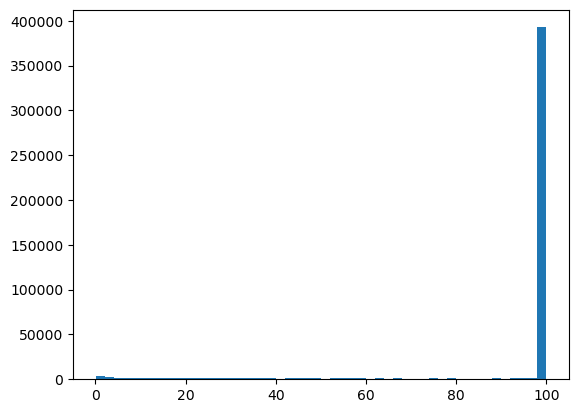

In [134]:
plt.hist(cons['PCTBLK_x'], bins=50);

In [135]:
cons[(cons['PCTBLK_x'] == 100) &
    (cons['PCTBLK_y'] == 100)].shape

(329441, 49)

In [136]:
cons[(cons['PCTBLK_x'] == 100) &
    (cons['PCTBLK_y'] < 100)].shape

(61977, 49)

In [172]:
cons[(cons['PCTBLK_x'] < 100) &
    (cons['PCTBLK_y'] == 100)].shape

(336338, 50)

In [174]:
cons[(cons['PCTBLK_x'] < 100) &
    (cons['PCTBLK_y'] < 100)].shape

(110919, 50)

In [137]:
cons['KEY_22'] = pd.factorize(cons['BLOCK_KEY'].astype(str) + cons['SRPREC_KEY_x'])[0]
cons.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,...,SRPREC_KEY_y,ELECTION_y,GEO_TYPE_y,BLOCK_y,BLKREG_y,SRTOTREG_y,PCTSRPREC_y,BLKTOTREG_y,PCTBLK_y,KEY_22
0,109,2372,1849,620,2260,264,391,2173,1604,859,...,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0,0
1,109,2372,1849,620,2260,264,391,2173,1604,859,...,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0,1
2,109,2372,1849,620,2260,264,391,2173,1604,859,...,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0,2
3,109,2372,1849,620,2260,264,391,2173,1604,859,...,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0,3
4,109,2372,1849,620,2260,264,391,2173,1604,859,...,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0,4


In [166]:
cons['PCTBLK_x'] = cons['PCTBLK_x'] / 100
cons['PCTSRPREC_x'] = cons['PCTSRPREC_x'] / 100
cons[['PCTBLK_x', 'PCTSRPREC_x']].head()

,PCTBLK_x,PCTSRPREC_x
0,1.0,0.016129
1,1.0,0.012097
2,1.0,0.024770
3,1.0,0.031682
4,1.0,0.026498


In [170]:
cons['BLKREG_x'] = cons['BLKREG_x'] * cons['PCTBLK_x']